In [37]:
from binarytree import build

import networkx as nt
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [58]:
def build_tree(row):
    raw_tree = np.array(row.split()).astype(np.int)
    tree = [v if v > -1 else None for v in raw_tree]
    return build(tree)

def print_tree(path):
    with open(path) as f:
        tree_str = f.readlines()[0]
    print(name, build_tree(tree_str))
    
def print_transm_net(path):
    with open(path) as f:
        text = f.readlines()
        param = int(text[0].strip())
        lines = [line.strip() for line in text[1:]]
    trans_net = nt.parse_adjlist(lines, nodetype = int)
    print("S_metric is ", param)
    print("\n Transmission network")
    nt.draw(trans_net, with_labels=True)

base_path = "../Algorithm/Algorithm/out/test/"
names = ["raw_shape.txt", "pruned_shape.txt", "colored_tree.txt"]

## Creating, pruning and coloring

In [47]:
for name in names:
    print_tree(base_path + name)

raw_shape.txt 
                   ________0_____________________________________
                  /                                              \
        _________0__                                ______________0_________________
       /            \                              /                                \
  ____0__            0__                  ________0______                        ____0____________
 /       \          /   \                /               \                      /                 \
0         0        9     0            __0__             __0                  __0__             ____0____
 \       / \            /            /     \           /   \                /     \           /         \
  0     6   0          7         ___0       0__       0     0            __0       0       __0         __0
   \         \                  /    \     /   \     / \     \          /   \     /       /   \       /   \
    5         10               0      2   1     0   6   

S_metric is  449

 Transmission network


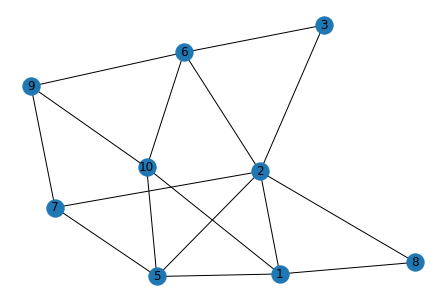

In [48]:
print_transm_net(base_path + "transm_net.txt")

## Indices of vertices in tree to recolor

In [49]:
name = "vertices_to_recolor.txt"
with open(base_path + name) as f:
    line = f.readlines()[0]
print(name, line, "<- last one is to be recolored!!!")

vertices_to_recolor.txt 0 1 2 3 4 5 6 8 11 12 14 23 24 25 27 29 30 47 55 59 1  <- last one is to be recolored!!!


In [50]:
name = "recolored_tree.txt"
print_tree(base_path + name)

recolored_tree.txt 
              ______2_______________________________
             /                                      \
    ________5__                            __________2_______________
   /           \                          /                          \
  5__           7                  ______2______                    __6__________
 /   \         / \                /             \                  /             \
5     10      9   7            __2__           __6              __6             __2__
     /  \                     /     \         /   \            /   \           /     \
    6    10               ___2       5       6     3        __6     6       __8       2
                         /    \     / \     / \            /   \           /   \     / \
                        1      2   1   5   6   2         _9     6         1     8   2   3
                       / \                              /  \             / \
                      1   10                      

S_metric is  395

 Transmission network


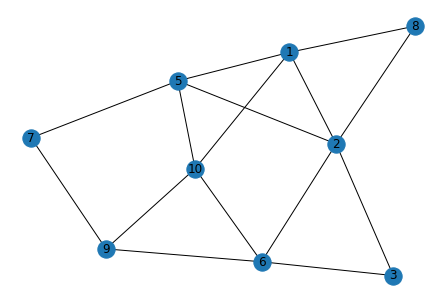

In [51]:
print_transm_net(base_path + "rec_transm_net.txt")

# Run MCMC

### Do s_metrics converge to a single value?

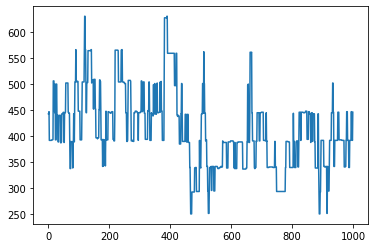

In [57]:
name = "mcmc_s_metrics.txt"
with open(base_path + name) as f:
    line = f.readlines()[0]
s_metrics = [int(s) for s in line.split()]
plt.plot(s_metrics)

### Distribution of tree indices to be chosen

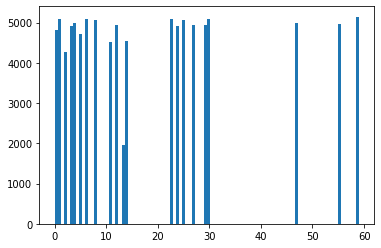

In [53]:
name = "mcmc_recolored_vertices.txt"
with open(base_path + name) as f:
    line = f.readlines()[0]
s_metrics = [int(s) for s in line.split()]
ax = plt.hist(s_metrics, bins = 100)